<a href="https://colab.research.google.com/github/vkatiyar/PyTorchPractice/blob/main/01_tensor_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 important pytorch functions to work with the images

An short introduction about PyTorch and about the chosen functions. 

- reshape
- hstack
- vstack
- dstack
- stack

Before we begin, let's install and import PyTorch

In [1]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
!pip install numpy torch torchvision torchaudio

In [2]:
# Import torch and other required modules
import torch
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Function 1 - torch.reshape

```reshape``` function changes the shape of the input tensor into the given shape.


Returns: return function return view(by using ```tensor.view```) that means the input tensor will not change itself and if not possible then it will return a copy by using continguous(```tensor.contiguous```) function. 

In [4]:
# Example 1 - working 
a = torch.tensor([[1, 2, 3, 4]])
print(a.shape)


torch.Size([1, 4])


In [5]:
b = a.reshape((2,2))
print("Shape of b =",b.shape)
print("b = ", b)

print("Shape of a =",a.shape)
print("a = ", a)


Shape of b = torch.Size([2, 2])
b =  tensor([[1, 2],
        [3, 4]])
Shape of a = torch.Size([1, 4])
a =  tensor([[1, 2, 3, 4]])


In the above example it can be seen that reshape function does not change the source tensor itself and return a view only. As 'b' has the reshaped tensor while a is still the same.  

In [6]:
# Example 2 - working
a=a.reshape((4,1))
print("reshaped =",a)

reshaped = tensor([[1],
        [2],
        [3],
        [4]])


So if we want to use reshape the tensor at it's own place then we should call like ``` a = a.reshape(shape=())``` 

In [7]:
# Example 3 - breaking (to illustrate when it breaks)
print(a.reshape(3,2))

RuntimeError: ignored

the given shape in the reshape function must match with the size of the tensor. Otherwise it will give an error for size mismatch. Like in case of above example the new shape is given as (3,2) which makes total size is 6, however the size of 'a' is just 4, this is why it will result into a runtime error.

Let's save our work using Jovian before continuing.

In [8]:
!pip install jovian --upgrade

Requirement already up-to-date: jovian in /usr/local/lib/python3.6/dist-packages (0.2.26)


In [9]:
import jovian

In [10]:
jovian.commit(project='01-tensor-operations')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.


In [11]:
a1 = torch.arange(start=1, end=10)
a2 = torch.arange(start=101, end=110)
a3 = torch.arange(start=201, end=210)
print("Size of tensor a1 = {}, a2 = {}, a3 = {}".format(a1.size(),a2.size(),a3.size()))

Size of tensor a1 = torch.Size([9]), a2 = torch.Size([9]), a3 = torch.Size([9])


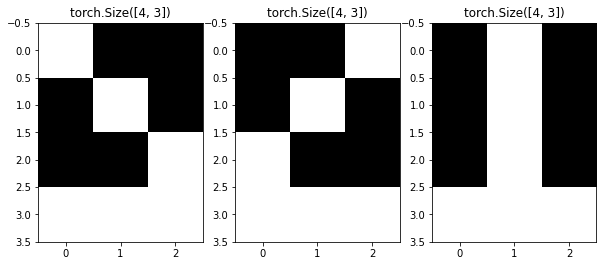

In [12]:
band1 = torch.tensor([[255,0,0],
         [0,255,0],
         [0,0,255],
         [255,255,255]]) 
band2 = torch.tensor([[0,0,255],
         [0,255,0],
         [255,0,0],
         [255,255,255]])
band3 = torch.tensor([[0,255,0],
         [0,255,0],
         [0,255,0],
         [255,255,255]])

_,ax = plt.subplots(1,3,squeeze=True, figsize=(10,10))
ax[0].set_title(band1.size())
ax[0].imshow(band1,cmap = 'gray') 
ax[1].set_title(band2.size())
ax[1].imshow(band2,cmap = 'gray') 
ax[2].set_title(band3.size())  
ax[2].imshow(band3,cmap = 'gray')  

## Function 2 - hstack

```hstack``` is used to stack the given tensor horizontally or on axis-1 in case multi-dimentional tensor. In case of one dimentional array it will stack on it's only axis available.

In [13]:
# Example 1 - working
arr = torch.hstack((a1,a2,a3))
print("Array after stacking all three bands using hstack => ", arr.size())  
print(arr)                     

Array after stacking all three bands using hstack =>  torch.Size([27])
tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 201, 202, 203, 204, 205, 206, 207, 208, 209])


In case of above example, the tensor remains of the same dimention but the total values in the row has been the result of concatenatenation of all the three tensors sequentially. 

Array after stacking all three bands using hstack =>  torch.Size([4, 9])
tensor([[255,   0,   0,   0,   0, 255,   0, 255,   0],
        [  0, 255,   0,   0, 255,   0,   0, 255,   0],
        [  0,   0, 255, 255,   0,   0,   0, 255,   0],
        [255, 255, 255, 255, 255, 255, 255, 255, 255]])


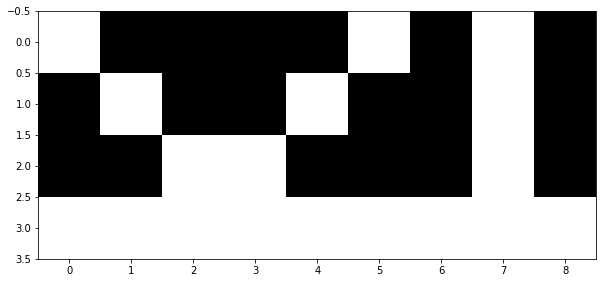

In [14]:
# Example 2 - working
arr = torch.hstack((band1,band2,band3))
print("Array after stacking all three bands using hstack => ", arr.size())
print(arr)
plt.figure(figsize=(10,10))
plt.imshow(arr,cmap='gray')

Explanation:
 the output of the ```hstack``` is horizontal stacking of the arrays along the first axis. In case of a metrix this can be understood as stacking along  the rows. This is why the number of rows remains same but number of columns increases.

In [15]:
# Example 3 - breaking (to illustrate when it breaks)
reshaped_band1 = band1.reshape(3,4)
print("Reshaped tensor size = ", reshaped_band1.size())
print( "Other tensor's size =",band2.size(),band3.size())
arr = torch.hstack((reshaped_band1,band2,band3))

# print("Array after stacking all three bands using hstack => ", arr.size())
# plt.figure(figsize=(10,10))
# plt.imshow(arr,cmap='gray')

Reshaped tensor size =  torch.Size([3, 4])
Other tensor's size = torch.Size([4, 3]) torch.Size([4, 3])


RuntimeError: ignored

Explanation:
Reshaped tensor has 3 rows while other tensor has 4 rows, and as explained above, the ```hstack``` needs common first axis along which it stacked the arrays. In absence of this, it will genrate ```RuntimeError```. 

In [ ]:
jovian.commit(project='01-tensor-operations')

## Function 3 - vstack

Rowwise concatenation of the tensors.

In [ ]:
# Example 1 - working
arr = torch.vstack((a1,a2,a3))
print("Array after stacking all three bands using hstack => ", arr.size())  
print(arr)  

In [ ]:
# Example 2 - working
arr = torch.vstack((band1,band2,band3))
print("Array after stacking all three bands using hstack => ", arr.size())
plt.figure(figsize=(10,10))
plt.imshow(arr,cmap='gray')

Explanation about example

In [16]:
# Example 3 - breaking (to illustrate when it breaks)
reshaped_band1 = band1.reshape(3,4)
print("Reshaped tensor size = ", reshaped_band1.size())
print( "Other tensor's size =",band2.size(),band3.size())
arr = torch.vstack((reshaped_band1,band2,band3))

Reshaped tensor size =  torch.Size([3, 4])
Other tensor's size = torch.Size([4, 3]) torch.Size([4, 3])


RuntimeError: ignored

Explanation about example

Closing comments about when to use this function

In [17]:
jovian.commit(project='01-tensor-operations')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.


## Function 4 - dstack

Depthwise concatenation. or stacking along the third axis.

In [18]:
# Example 1 - working
arr = torch.dstack((a1,a2,a3))
print("Array after stacking all three bands using hstack => ", arr.size())  
print(arr) 

Array after stacking all three bands using hstack =>  torch.Size([1, 9, 3])
tensor([[[  1, 101, 201],
         [  2, 102, 202],
         [  3, 103, 203],
         [  4, 104, 204],
         [  5, 105, 205],
         [  6, 106, 206],
         [  7, 107, 207],
         [  8, 108, 208],
         [  9, 109, 209]]])


**Explanation** 
Example with the 1-D array. We can see here that shape of the tensor has been changed to 3-D, while in case of ```hstack, vstack``` it has been changed to 2-D. 

Array after stacking all three bands using hstack =>  torch.Size([4, 3, 3])
tensor([[[255,   0,   0],
         [  0,   0, 255],
         [  0, 255,   0]],

        [[  0,   0,   0],
         [255, 255, 255],
         [  0,   0,   0]],

        [[  0, 255,   0],
         [  0,   0, 255],
         [255,   0,   0]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]]])


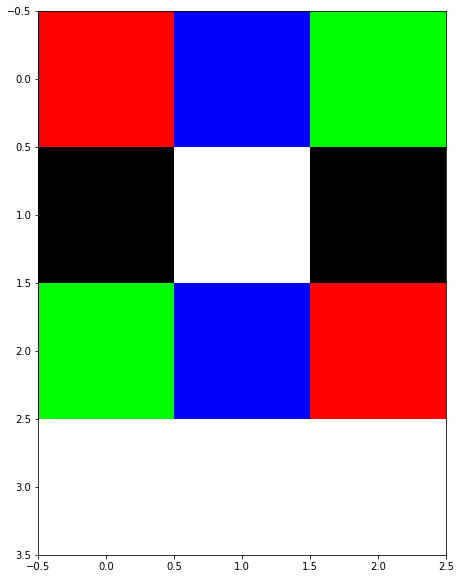

In [19]:
# Example 2 - working
arr = torch.dstack((band1,band2,band3))
print("Array after stacking all three bands using hstack => ", arr.size())
print(arr)
plt.figure(figsize=(10,10))
plt.imshow(arr,cmap='gray')

Explanation: 

Example with the 2-D array.

In [20]:
# Example 3 - breaking (to illustrate when it breaks)
reshaped_band1 = band1.reshape(3,4)
print("Reshaped tensor size = ", reshaped_band1.size())
print( "Other tensor's size =",band2.size(),band3.size())
arr = torch.dstack((reshaped_band1,band2,band3))

Reshaped tensor size =  torch.Size([3, 4])
Other tensor's size = torch.Size([4, 3]) torch.Size([4, 3])


RuntimeError: ignored

Explanation about example

Closing comments about when to use this function

In [21]:
jovian.commit(project='01-tensor-operations')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.


## Function 5 - stack

stack is the genralised stacking command in which we can pass the dimenstion (axis) along which we want our tensors to be concatenated. 

In [22]:
# Example 1 - working
arr = torch.stack((a1,a2,a3),dim=0)
print("Array after stacking all three bands using hstack => ", arr.size())  
print(arr) 

Array after stacking all three bands using hstack =>  torch.Size([3, 9])
tensor([[  1,   2,   3,   4,   5,   6,   7,   8,   9],
        [101, 102, 103, 104, 105, 106, 107, 108, 109],
        [201, 202, 203, 204, 205, 206, 207, 208, 209]])


Explanation about example

Array after stacking all three bands using hstack =>  torch.Size([3, 4, 3])
tensor([[[255,   0,   0],
         [  0, 255,   0],
         [  0,   0, 255],
         [255, 255, 255]],

        [[  0,   0, 255],
         [  0, 255,   0],
         [255,   0,   0],
         [255, 255, 255]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         [255, 255, 255]]])


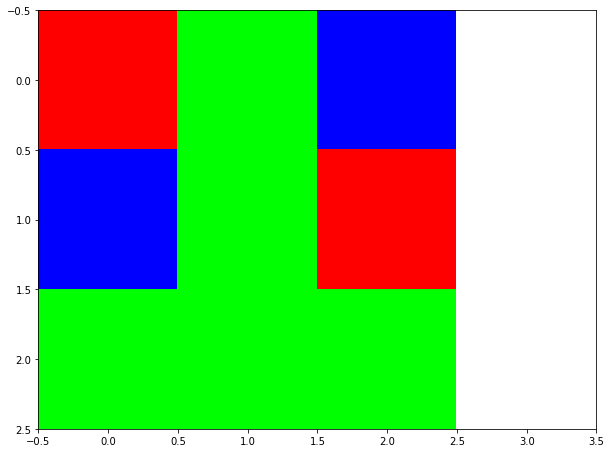

In [23]:
# Example 2 - working
arr = torch.stack((band1,band2,band3),dim=-3)
print("Array after stacking all three bands using hstack => ", arr.size())
print(arr)
plt.figure(figsize=(10,10))
plt.imshow(arr,cmap='gray')

Explanation about example

In [24]:
# Example 3 - breaking (to illustrate when it breaks)
arr = torch.stack((band1,band2,band3),dim=3)
print("Array after stacking all three bands using hstack => ", arr.size())
print(arr)

IndexError: ignored

In the above example the dimension has been paased as 3 for a two dimention tensor, resulting into 'dimension out of range' ```IndexError```. So while using stack command the dimenstion need to be checked carefully. Also, look for the range provided for the stacking is $ [-3,2] $ for a two dimension tensor.

Stacking commands are very useful while working with the images as a color image is nothing but stacking of three bands 'Red', 'Green', and "Blue'.

In [25]:
jovian.commit(project='01-tensor-operations')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.


## Conclusion

This notebook has covererd some of the important tensor operations which will come handy while working with the images. We have seen examples of the following commands in the notebook: 

``` reshape, hstack, vstack, dstack, stack```

## Reference Links
Provide links to your references and other interesting articles about tensors
* Official documentation for tensor operations: https://pytorch.org/docs/stable/generated/torch.stack.html?highlight=stack
* ...

In [26]:
jovian.commit(project='01-tensor-operations')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.
